In [ ]:
# import necessary libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



---



#Load our dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the data files using pandas read_csv function
order_products = pd.read_csv('/content/order_products.csv', sep=';')
aisles = pd.read_csv('/content/aisles.csv',sep=';')
departments = pd.read_csv('/content/departments.csv',sep=';')
instacart_orders = pd.read_csv('/content/instacart_orders.csv',sep=';')
products = pd.read_csv('/content/products.csv',sep=';')

In [ ]:
# # Loading the data files using pandas read_csv function
# order_products = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CLIENTS/6. topesanni/Data analysis project/Insta Cart Analysis/order_products.csv', sep=';')
# aisles = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CLIENTS/6. topesanni/Data analysis project/Insta Cart Analysis/aisles.csv',sep=';')
# departments = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CLIENTS/6. topesanni/Data analysis project/Insta Cart Analysis/departments.csv',sep=';')
# instacart_orders = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CLIENTS/6. topesanni/Data analysis project/Insta Cart Analysis/instacart_orders.csv',sep=(';'))
# products = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CLIENTS/6. topesanni/Data analysis project/Insta Cart Analysis/products.csv',sep=';')



---



#Assessing the datasets

##order_products

In [ ]:
# We are viewing 5 random rows in order_product file
# Initially all columns are congested beacause it was not comma delimited file thats why we used sep parameter to sepearte the values
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [ ]:
# What is the shape of order_products
order_products.shape

(4545007, 4)

In [ ]:
# Checking data types by using info function
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


- The datatype of add_to_cart_order is float but can be converted to integer.

In [ ]:
# To check the missing values
order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [ ]:
# To check the missing values percentage in each column
order_products.isna().sum()/order_products.shape[0]*100

order_id             0.000000
product_id           0.000000
add_to_cart_order    0.018394
reordered            0.000000
dtype: float64

- We have less than 5% missing values in add to cart column so we can simply remove these rows from the dataset.

In [ ]:
# To check the duplicated entries in whole dataset
order_products.duplicated().sum()

0

- There are no duplicated rows present in my data set so we donot need to remove them.

In [ ]:
# Specify the columns to check for unique values
columns_of_interest = ['order_id', 'product_id', 'add_to_cart_order', 'reordered']

# Loop through the specified columns and display the count of unique values
for column in columns_of_interest:
    unique_count = order_products[column].nunique()
    print(f"Number of unique values in column '{column}': {unique_count}")

Number of unique values in column 'order_id': 450046
Number of unique values in column 'product_id': 45573
Number of unique values in column 'add_to_cart_order': 64
Number of unique values in column 'reordered': 2


In [ ]:
# Specify the columns I want to check for duplicates within
columns_of_interest = ['order_id', 'product_id', 'add_to_cart_order', 'reordered']

# Loop through the specified columns and display any duplicates
for column in columns_of_interest:
    duplicates = order_products[order_products.duplicated(subset=[column])]
    if not duplicates.empty:
        display(f"Duplicates in column '{column}':")
        display(duplicates)

"Duplicates in column 'order_id':"

,order_id,product_id,add_to_cart_order,reordered
367,2867619,48094,9.0,0
824,844425,39408,10.0,1
1124,3319857,37067,19.0,0
1258,1038788,12471,14.0,0
1303,2825714,44632,16.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


"Duplicates in column 'product_id':"

,order_id,product_id,add_to_cart_order,reordered
19,2500729,21616,5.0,1
20,1687771,22963,5.0,1
75,2186234,13176,2.0,1
78,145751,47626,8.0,1
80,497429,26209,9.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


"Duplicates in column 'add_to_cart_order':"

,order_id,product_id,add_to_cart_order,reordered
2,2261212,26683,1.0,1
6,644579,12341,5.0,1
9,420019,23315,4.0,1
12,522547,40571,10.0,1
14,1961225,37553,1.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


"Duplicates in column 'reordered':"

,order_id,product_id,add_to_cart_order,reordered
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
5,2456893,21616,4.0,1
6,644579,12341,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


**REASONS TO NOT REMOVE ANY OF THESE DUBLICATED VALUE**

OVERALL ROWS IN THIS DATAFRAME = 4545007

Duplicates in column 'order_id' ............................(DUBLICATED VALUES)..4094961 .........(UNIQUE VALUES)450,046

Duplicates in column 'product_id'....................... (DUBLICATED VALUES)..4499434 ..........(UNIQUE VALUES)45,573

Duplicates in column 'add_to_cart_order'...........(DUBLICATED VALUES)..4544942...........(UNIQUE VALUES)65

Duplicates in column 'reordered' ........................(DUBLICATED VALUES)..4545005............(UNIQUE VALUES)2

- All of these unique values are calculated by substracting the original rows from dublicated values
- As they posed no serious threat to our analysis beacause these small number of unique values have to repeat in our dataframe named"order_products" so we dont need to remove them from our dataframe

In [ ]:
# To check summaru statistics
order_products.describe()

,order_id,product_id,add_to_cart_order,reordered
count,4.545007e+06,4.545007e+06,4.544171e+06,4.545007e+06
mean,1.711166e+06,2.558084e+04,8.351669e+00,5.905025e-01
std,9.850955e+05,1.409552e+04,7.080368e+00,4.917411e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.608170e+05,1.353500e+04,3.000000e+00,0.000000e+00
50%,1.711530e+06,2.527200e+04,6.000000e+00,1.000000e+00
75%,2.561311e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421079e+06,4.969400e+04,6.400000e+01,1.000000e+00


**Findings from summary statistics of `order_product`**
- The average number of products customer bought is 8.35
- The standard deviation w.r.t products bought by customers is 7.1
- The minimum number of products which customer bought is 1 and the maximum stands at 64.




---



##Aisles

In [ ]:
# We are viewing 5 random rows in aisle file
# Initially all columns are congested beacause it was not comma delimited file thats why we used sep parameter to sepearte the values
aisles.sample(5)

,aisle_id,aisle
45,46,mint gum
38,39,seafood counter
121,122,meat counter
10,11,cold flu allergy
16,17,baking ingredients


In [ ]:
# To check the rows and columsn
aisles.shape

(134, 2)

In [ ]:
# To check the data types of columns
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


-  Both column are corrected datatypes

In [ ]:
# To check the missing value
aisles.isna().sum()

aisle_id    0
aisle       0
dtype: int64

-  No missing values are present in the dataset

In [ ]:
# To check the duplicated rows
aisles.duplicated().sum()

0

-  we have checked and they are no duplicated rows.

In [ ]:
# To count unique values present in aisles
aisles['aisle'].nunique()

134

-  they are 134 aisles present in the dataset.



---



##Departments

In [ ]:
departments.sample(5)

,department_id,department
10,11,personal care
4,5,alcohol
12,13,pantry
17,18,babies
13,14,breakfast


In [ ]:
departments.shape

(21, 2)

In [ ]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [ ]:
departments.isna().sum()

department_id    0
department       0
dtype: int64

In [ ]:
departments.duplicated().sum()

0

-  **Observations from the Department dataframe**


*   The datatypes are correct
- They are no missing valaues and duplicated rows present in the department dataset.



---



##Instacart_orders

In [ ]:
instacart_orders.sample(5)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
188531,1424541,169188,1,1,13,NaN
391251,2994436,167745,10,6,13,7.0
242612,2272822,179176,6,2,16,13.0
418535,2600138,2520,18,4,7,6.0
181761,3136525,22507,16,5,4,1.0


In [ ]:
instacart_orders.shape

(478967, 6)

In [ ]:
instacart_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


-  The datatype of the day_since_prior_order is not correct, i will convert it into the integar datatype

In [ ]:
instacart_orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64

In [ ]:
# To check the missing values percentage in each column
instacart_orders.isna().sum()/instacart_orders.shape[0]*100

order_id                  0.000000
user_id                   0.000000
order_number              0.000000
order_dow                 0.000000
order_hour_of_day         0.000000
days_since_prior_order    6.016907
dtype: float64

-  6% data was missing in days_since_prior_order, sine it's more than 5% i will formulate a strategy to imput the missing values.    

In [ ]:
instacart_orders.duplicated().sum()

15

In [ ]:
duplicated_rows=instacart_orders[instacart_orders.duplicated()]
duplicated_rows

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


-  They are 15 duplicated entry in this dataframe, i will remove it in the data cleaning step.
- All the duplicated entries happened at a specific time, eg; 2am on the 3rd of the week. which shows the potential data entry mistake.

In [ ]:
# Specify the columns to check for unique values
columns_of_interest = ['order_id'	, 'user_id']

# Loop through the specified columns and display the count of unique values
for column in columns_of_interest:
    unique_count = instacart_orders[column].nunique()
    print(f"Number of unique values in column '{column}': {unique_count}")

Number of unique values in column 'order_id': 478952
Number of unique values in column 'user_id': 157437


-  'order_id': 478952 it shows the total number of order placed by the customers.
-  'user_id': 157437 it shows the total of customers associated with the instacart.

In [ ]:
instacart_orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,4.789670e+05,478967.000000,478967.000000,478967.000000,478967.000000,450148.000000
mean,1.709947e+06,102966.537475,17.157808,2.775058,13.446676,11.101751
std,9.869480e+05,59525.328991,17.704688,2.045869,4.224986,9.189975
min,4.000000e+00,2.000000,1.000000,0.000000,0.000000,0.000000
25%,8.564685e+05,51414.000000,5.000000,1.000000,10.000000,4.000000
50%,1.709522e+06,102633.000000,11.000000,3.000000,13.000000,7.000000
75%,2.562990e+06,154419.000000,23.000000,5.000000,16.000000,15.000000
max,3.421079e+06,206209.000000,100.000000,6.000000,23.000000,30.000000


-  On the avg the customer are placing 17 orders. 75% of customers placed orders 23 or less. the max number of order placed by a customer is 100.
-  Custmoers placed next order after 11 days on the avg. 75% of customers placed their next order after 15days. The max customer wait time to place next order was 30days.






---



In [ ]:
products.sample(5)

,product_id,product_name,aisle_id,department_id
7885,7886,Organic Traditional Soba,66,6
41389,41390,Major Dickason's Blend Dark Roast K-Cups,26,7
13541,13542,Oreo Cookies & Cream Bars,37,1
36155,36156,90708- Nightlight 4 Bulb- Long Life- Blister Pack,87,17
46600,46601,Lavender & Peach Multi-Surface Cleaner,114,17


In [ ]:
products.shape

(49694, 4)

In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


-  All the datatype are correct in the dataframe

In [ ]:
products.isna().sum()

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [ ]:
# To check the missing values percentage in each column
products.isna().sum()/products.shape[0]*100

product_id       0.000000
product_name     2.531493
aisle_id         0.000000
department_id    0.000000
dtype: float64

- they are 2.5% missing value in the dataframe, therefore i will remove it in the data cleaning step.

In [ ]:
# Specify the columns to check for unique values
columns_of_interest = ['product_id',	'product_name',	'aisle_id',	'department_id']

# Loop through the specified columns and display the count of unique values
for column in columns_of_interest:
    unique_count = products[column].nunique()
    print(f"Number of unique values in column '{column}': {unique_count}")

Number of unique values in column 'product_id': 49694
Number of unique values in column 'product_name': 48436
Number of unique values in column 'aisle_id': 134
Number of unique values in column 'department_id': 21


- product_name': 48436 They are 48436 products in my dataframe.



---



---



#Data Cleaning

**1. Missing values in add_to_cart_order**

In [ ]:
order_products.dropna(inplace=True)
order_products.shape

(4544171, 4)

- this is to remove the missing value(0.18%) in the add_to_cart_order by using the dropna method

In [ ]:
order_products.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

**2. Deal with incorrect data type of add_to_cart_order**

In [ ]:
order_products['add_to_cart_order']=order_products['add_to_cart_order'].astype('int')
order_products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4544171 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 173.3 MB


- I have Converted the datatype of add to cart order from float to integar by using the astype function

**3. To deal with missing values in days_since_prior_order**

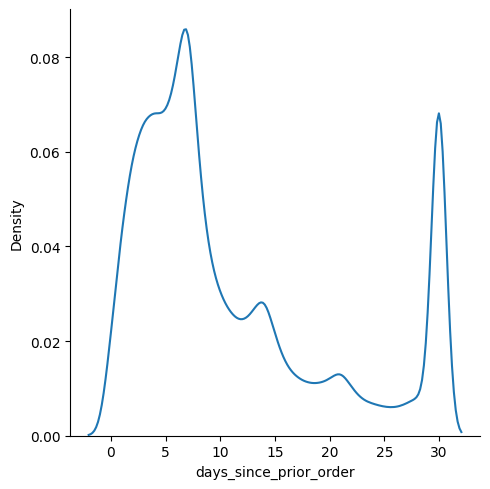

In [ ]:
# To check the distribution of days_since_prior_order
days_since_prior_order= instacart_orders['days_since_prior_order']

# creating kde plot for days_since_prior_order
sns.displot(days_since_prior_order,kind= 'kde')

In [ ]:
# To find the mean value of days_since_prior_order
mean_value_of_days_since_prior_order=instacart_orders['days_since_prior_order'].mean()
mean_value_of_days_since_prior_order

11.101750979677794

In [ ]:
# Fill NaN values in 'days_since_prior_order' with the calculated mean
instacart_orders['days_since_prior_order'] = instacart_orders['days_since_prior_order'].fillna(mean_value_of_days_since_prior_order)
# To confirm data imputation with mean
instacart_orders.isna().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

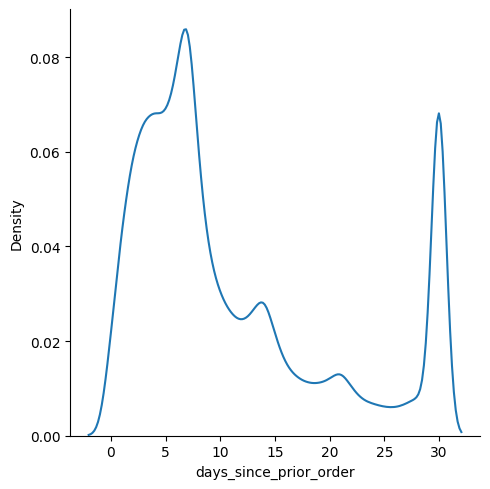

In [ ]:
# creating kde plot for days_since_prior_order for confirmation
sns.displot(days_since_prior_order,kind= 'kde')

- the dataframe shows a 6% missing value in day since prior order, i am using the mean strategy. To check whether the distribution will be affected with the mean strategy, i created 2 PDFs before or after imputting the missing values with mean.The PDF graphs shows the same distribution, confirming that the mean strategy is fine.

**4. To deal with incorrect data type in days_since_prior_order**

In [ ]:
instacart_orders['days_since_prior_order']=instacart_orders['days_since_prior_order'].astype('int')
instacart_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   order_id                478967 non-null  int64
 1   user_id                 478967 non-null  int64
 2   order_number            478967 non-null  int64
 3   order_dow               478967 non-null  int64
 4   order_hour_of_day       478967 non-null  int64
 5   days_since_prior_order  478967 non-null  int64
dtypes: int64(6)
memory usage: 21.9 MB


- We cahnged the data type of days since prior order from float to int by using astype function.

**5. To remove the duplicated rows present in instacart_orders**

In [ ]:
instacart_orders.drop_duplicates(inplace=True)
instacart_orders.shape

(478952, 6)

- Remove the duplicated rows present in instacart orders dataframe.

In [ ]:
instacart_orders.duplicated().sum()


0

**6. To deal with missing values in products names column**

In [ ]:
products.dropna(inplace=True)
products.isna().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

- we remove the 2% missing values present in product name column by using dropna method.



---



---



#Data Analysis

**Two approaches for any data analysis project**

1. When you are provided with certain sets of questions along with data
2. When you are only provided with data and asked to find the insights from the data.

- We will use the **first approach**!





---



**Q#1 Verify that the 'order_hour_of_day' and 'order_dow' values in the orders tables are sensible (i.e. 'order_hour_of_day' ranges from 0 to 23 and 'order_dow' ranges from 0 to 6)**

In [ ]:
instacart_orders['order_dow'].unique()

array([6, 5, 0, 4, 3, 1, 2])

In [ ]:
instacart_orders['order_dow'].nunique()

7

In [ ]:
instacart_orders['order_hour_of_day'].unique()

array([13, 12, 19, 20, 11,  8, 18, 15, 16,  9, 22, 10,  0, 14, 17,  1,  7,
        6,  2, 21,  3, 23,  5,  4])

In [ ]:
instacart_orders['order_hour_of_day'].nunique()

24

- There are 7 values and 24 values present in ` order dow` and `order hour of  day` confirming that there are 7 days and 24 hours correctly mentioned in the dataset.

**Q#2 What time of day do people shop for groceries?**

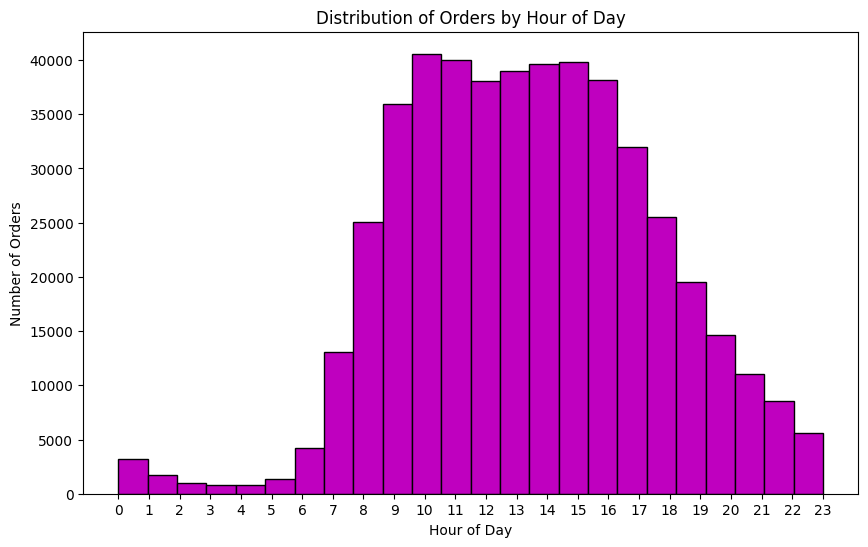

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(instacart_orders['order_hour_of_day'],bins=24,edgecolor='k',color='m')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders by Hour of Day')
plt.xticks(range(24))
plt.show()

- People mostly shop at afternoon and at evening time. No of orders during morning and night time is very less.

**Q#3 What day of the week do people shop for groceries?**

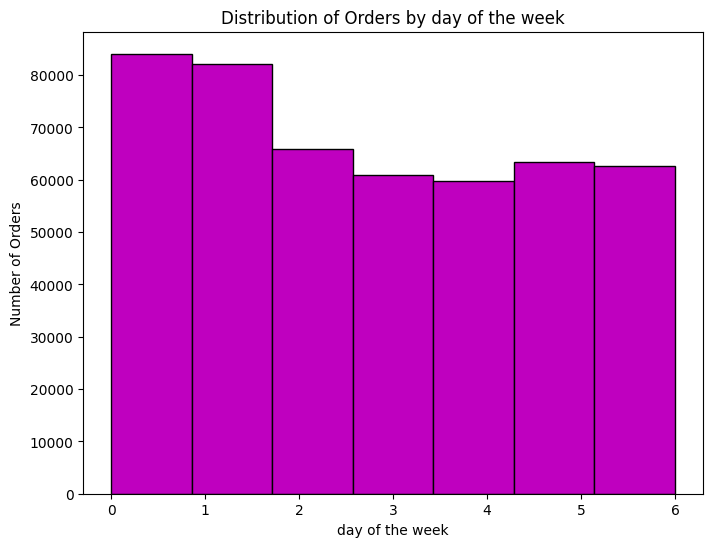

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(instacart_orders['order_dow'],bins=7,edgecolor='k',color='m')
plt.xlabel('day of the week')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders by day of the week')
plt.xticks(range(7))
plt.show()

- People shop more on weekends than weekdays relatively. Weekdays pattern of shoping is quite similar to each other.

**Q# 4. How long do people wait until placing another order?**

<Axes: ylabel='days_since_prior_order'>

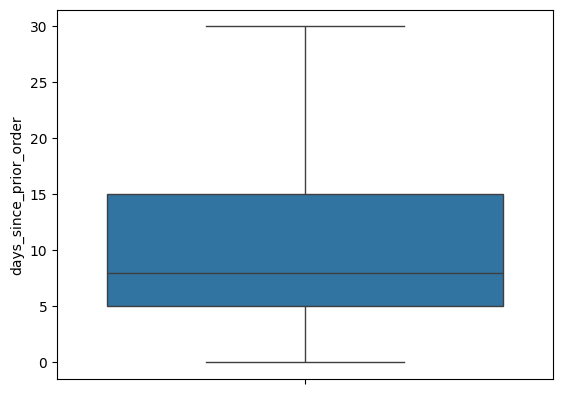

In [ ]:
sns.boxplot(instacart_orders['days_since_prior_order'])

- From the box plot we can confirm that we donot have outliers so we can stick with mean approach.

In [ ]:
# We can check the mean value of days_since_prior_order
instacart_orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,4.789520e+05,478952.000000,478952.000000,478952.000000,478952.000000,478952.000000
mean,1.709953e+06,102966.654911,17.157563,2.775051,13.447034,11.095688
std,9.869537e+05,59525.292863,17.704457,2.045901,4.224567,8.909281
min,4.000000e+00,2.000000,1.000000,0.000000,0.000000,0.000000
25%,8.564698e+05,51413.750000,5.000000,1.000000,10.000000,5.000000
50%,1.709521e+06,102633.000000,11.000000,3.000000,13.000000,8.000000
75%,2.563002e+06,154419.000000,23.000000,5.000000,16.000000,15.000000
max,3.421079e+06,206209.000000,100.000000,6.000000,23.000000,30.000000


In [ ]:
instacart_orders['days_since_prior_order'].mean()

11.095688085653677

In [ ]:
mean_value=instacart_orders['days_since_prior_order'].mean()

In [ ]:
instacart_orders['days_since_prior_order'].median()

8.0

In [ ]:
median_value=instacart_orders['days_since_prior_order'].median()

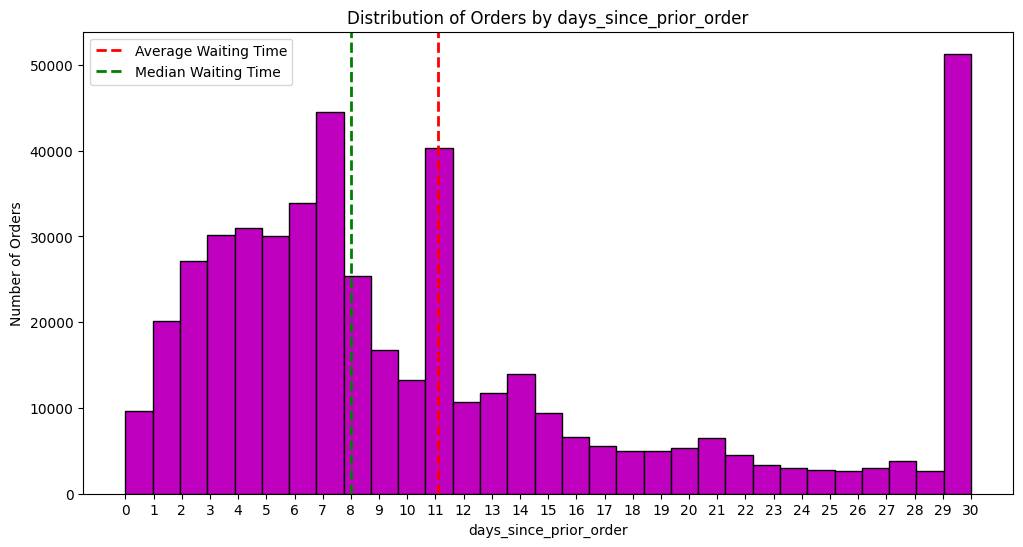

In [ ]:
plt.figure(figsize=(12,6))
plt.hist(instacart_orders['days_since_prior_order'],bins=31,edgecolor='k',color='m')
plt.xlabel('days_since_prior_order')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders by days_since_prior_order')
plt.xticks(range(31))
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Average Waiting Time')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label='Median Waiting Time')
plt.legend()
plt.show()

- The average number of days people take to place next order is 11 days. In terms of median strategy people take 8 days before placing next order.

**Q# 5. Is there a difference in 'order_hour_of_day' distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.**

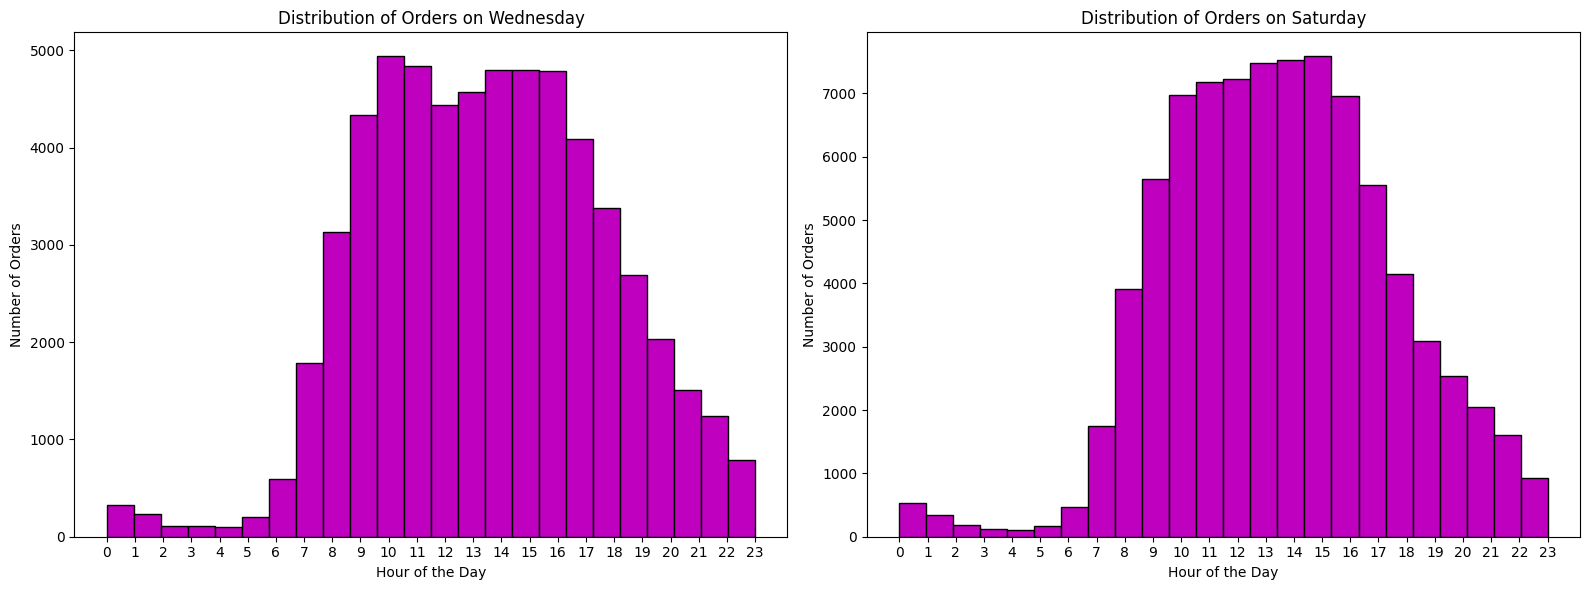

In [ ]:
# Assuming 0 = Saturday, 1 = Sunday, ..., 6 = Friday
wednesday_orders = instacart_orders[instacart_orders['order_dow'] == 4]
saturday_orders = instacart_orders[instacart_orders['order_dow'] == 0]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot the histogram for Wednesday
ax1.hist(wednesday_orders['order_hour_of_day'], bins=24, edgecolor='k', color='m')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Number of Orders')
ax1.set_title('Distribution of Orders on Wednesday')
ax1.set_xticks(range(24))

# Plot the histogram for Saturday
ax2.hist(saturday_orders['order_hour_of_day'], bins=24, edgecolor='k', color='m')
ax2.set_xlabel('Hour of the Day')
ax2.set_ylabel('Number of Orders')
ax2.set_title('Distribution of Orders on Saturday')
ax2.set_xticks(range(24))

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

- The hour of the day does not change the number of orders distribution on both days.



---



**Q # 6What's the distribution for the number of orders per customer?**

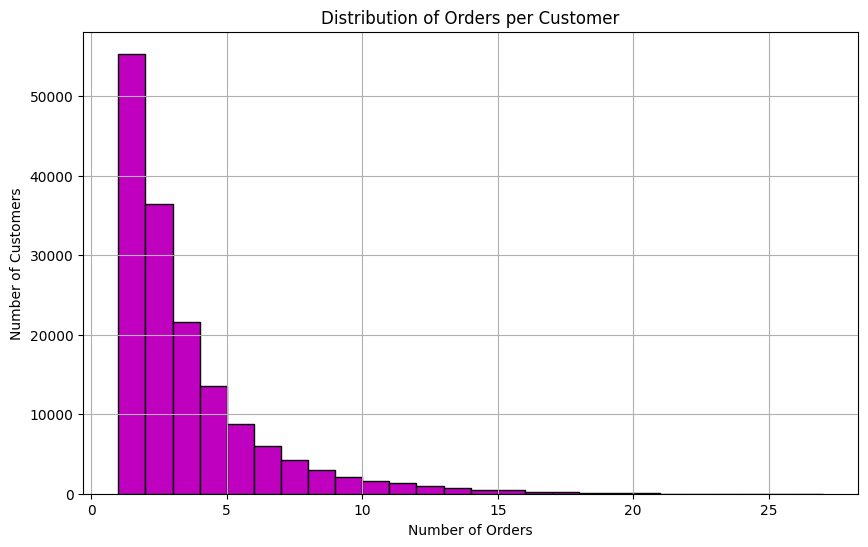

In [ ]:
# Group orders by 'user_id' and count the number of unique orders for each customer
orders_per_customer=instacart_orders.groupby('user_id')['order_id'].nunique()

#Creating a histogram
plt.figure(figsize=(10,6))
plt.hist(orders_per_customer,bins=range(1,max(orders_per_customer)),edgecolor='k',color='m')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.title('Distribution of Orders per Customer')
# applying grid on the graph for enhanced readability
plt.grid(True)
plt.show()

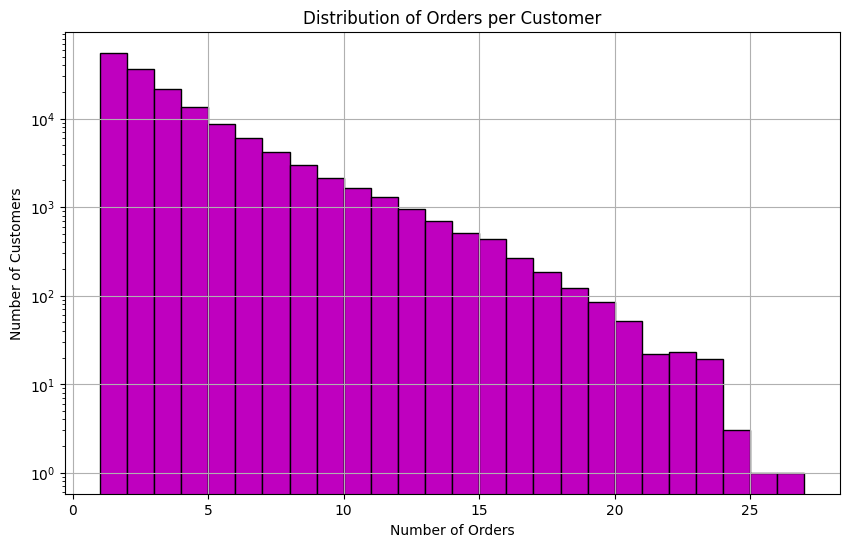

In [ ]:
# Group orders by 'user_id' and count the number of unique orders for each customer
orders_per_customer=instacart_orders.groupby('user_id')['order_id'].nunique()

#Creating a histogram with log scale
plt.figure(figsize=(10,6))
plt.hist(orders_per_customer,bins=range(1,max(orders_per_customer)),edgecolor='k',color='m',log=True)
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.title('Distribution of Orders per Customer')
# applying grid on the graph for enhanced readability
plt.grid(True)
plt.show()

- Most of the people have fewere number of orders ranging from 0 to 5 with majority placing either just 1 or 2 orders on average. There are only few people who place more than 15 orders.



---



---



**Q # 7 What are the top 20 popular products (display their id and name)?**

In [ ]:
# Count the number of times each product appears in orders
product_counts=order_products['product_id'].value_counts().reset_index().head(20)
product_counts.columns = ['product_id', 'count']

# merge the 'product_counts' dataframe with the 'products' dataframe to incorporate the product name
top_20_popular_products=product_counts.merge(products,on='product_id')

top_20_popular_products[['product_id','product_name','count']]

,product_id,product_name,count
0,24852,Banana,66046
1,13176,Bag of Organic Bananas,53295
2,21137,Organic Strawberries,37035
3,21903,Organic Baby Spinach,33970
4,47209,Organic Hass Avocado,29772
5,47766,Organic Avocado,24689
6,47626,Large Lemon,21495
7,16797,Strawberries,20017
8,26209,Limes,19689
9,27845,Organic Whole Milk,19600


**Q # 8 How many items do people typically buy in one order? What does the distribution look like?**

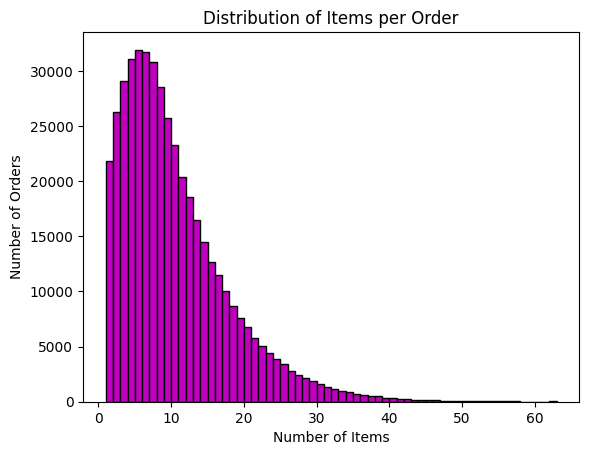

In [ ]:
# We Calculate the number of items in each order using product_id count
items_per_order=order_products.groupby('order_id')['product_id'].count()
average_items_per_order=items_per_order.mean()

# Plot the distribution of items per order
plt.hist(items_per_order,bins=range(1,max(items_per_order)),edgecolor='k',color='m')
plt.xlabel('Number of Items')
plt.ylabel('Number of Orders')
plt.title('Distribution of Items per Order')
plt.show()

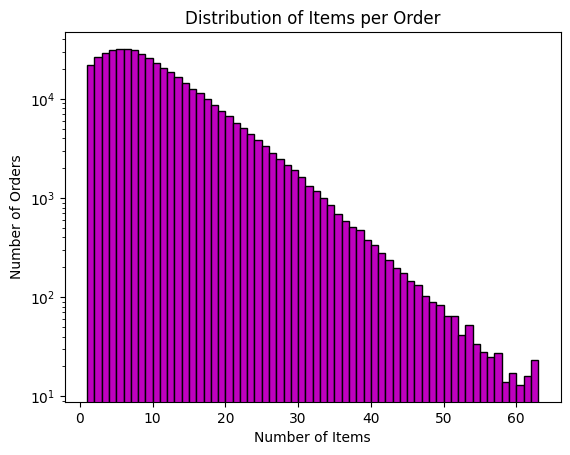

In [ ]:
# We Calculate the number of items in each order using product_id count
items_per_order=order_products.groupby('order_id')['product_id'].count()
average_items_per_order=items_per_order.mean()

# Plot the distribution of items per order with log scale
plt.hist(items_per_order,bins=range(1,max(items_per_order)),edgecolor='k',color='m',log=True)
plt.xlabel('Number of Items')
plt.ylabel('Number of Orders')
plt.title('Distribution of Items per Order')
plt.show()

- Most people buy 0 to 20 items per order with majority ranging fram 5 to 15 items. There are ver few people who buy more than 40 items.

**Q # 09 What are the top 20 items that are reordered most frequently (display their names and product IDs)?**

In [ ]:
# Filter the dataframe to include only reordered items
reordered_products=order_products[order_products['reordered']==1]

# Group by 'product_id' and count the number of times each product was reordered
top_20_reordered_products = reordered_products['product_id'].value_counts().head(20).reset_index()
top_20_reordered_products.columns = ['product_id', 'reorder_count']

# merge the 'reordered_products' dataframe with the 'products' dataframe to incorporate the product name
top_20_reordered_products=top_20_reordered_products.merge(products,on='product_id')

top_20_reordered_products[['product_id','product_name','reorder_count']]

,product_id,product_name,reorder_count
0,24852,Banana,55761
1,13176,Bag of Organic Bananas,44448
2,21137,Organic Strawberries,28637
3,21903,Organic Baby Spinach,26232
4,47209,Organic Hass Avocado,23628
5,47766,Organic Avocado,18743
6,27845,Organic Whole Milk,16251
7,47626,Large Lemon,15044
8,27966,Organic Raspberries,14747
9,16797,Strawberries,13944


- As a pattern i can say that these are the products which are most ppular as well. More popular the product, more reorderd will it be!



---



##Q # 10 For each product, what percentage of its orders are reorders?

In [ ]:
# To calculte the total number of orders for each product
total_orders_per_product=order_products.groupby('product_id')['order_id'].nunique().reset_index()
total_orders_per_product.rename(columns={'order_id':'total_orders'},inplace=True)

# To calculte the total number of reorders for each product
total_reorders_per_product=order_products[order_products['reordered']==1].groupby('product_id')['order_id'].nunique().reset_index()
total_reorders_per_product.rename(columns={'order_id':'total_reorders'},inplace=True)

# Merging the two dataframes
merged_dataframe=total_orders_per_product.merge(total_reorders_per_product,on='product_id')

# Calculating the percentage of reorders for each product
merged_dataframe['reorder_percentage']=merged_dataframe['total_reorders']/merged_dataframe['total_orders']*100
merged_dataframe

,product_id,total_orders,total_reorders,reorder_percentage
0,1,280,158,56.428571
1,3,42,31,73.809524
2,4,49,25,51.020408
3,7,2,1,50.000000
4,8,19,6,31.578947
...,...,...,...,...
36222,49690,5,4,80.000000
36223,49691,72,31,43.055556
36224,49692,12,5,41.666667
36225,49693,25,11,44.000000


- Some products are missing indicating that those products are not reordered at all.



---



##Q # 11 For each customer, what proportion of their products ordered are reorders?

In [ ]:
# merging two required dataframes
merged_df=order_products.merge(instacart_orders,on='order_id')
merged_df.drop(columns=['add_to_cart_order', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order'], inplace=True)

# Calculating total number of products orderded by each customer
total_products_per_customer=merged_df.groupby('user_id')['product_id'].nunique().reset_index()
total_products_per_customer.rename(columns={'product_id':'total_products_ordered'},inplace=True)

# Calculating total number of reordered products orderded by each customer
total_reorders_per_customer=merged_df[merged_df['reordered']==1].groupby('user_id')['product_id'].nunique().reset_index()
total_reorders_per_customer.rename(columns={'product_id':'total_products_reorders'},inplace=True)

# Merging the two dataframes
merged_dataframe=total_products_per_customer.merge(total_reorders_per_customer,on='user_id')

# Calculating the percentage of reorders for each customer
merged_dataframe['reorder_percentage']=merged_dataframe['total_products_reorders']/merged_dataframe['total_products_ordered']*100
merged_dataframe

,user_id,total_products_ordered,total_products_reorders,reorder_percentage
0,2,25,1,4.000000
1,5,12,8,66.666667
2,7,13,12,92.307692
3,11,15,3,20.000000
4,12,12,3,25.000000
...,...,...,...,...
132986,206203,27,6,22.222222
132987,206206,17,12,70.588235
132988,206207,33,28,84.848485
132989,206208,80,49,61.250000


- Some customers are missing indicating that those customers have not placed reordered at all.



---



## Q # 12 What are the top 20 items that people put in their carts first?

In [ ]:
# Group by product_id and calculate the count of occurrences (how many times it's put in carts first)
top_first_items=order_products[order_products['add_to_cart_order']==1]['product_id'].value_counts().head(20).reset_index()

# Merging the dataframes
top_first_items=top_first_items.merge(products,on='product_id')

# Dropping the unwanted columns
top_first_items.drop(columns=['aisle_id','department_id'],inplace=True)
top_first_items

,product_id,count,product_name
0,24852,15562,Banana
1,13176,11026,Bag of Organic Bananas
2,27845,4363,Organic Whole Milk
3,21137,3946,Organic Strawberries
4,47209,3390,Organic Hass Avocado
5,21903,3336,Organic Baby Spinach
6,47766,3044,Organic Avocado
7,19660,2336,Spring Water
8,16797,2308,Strawberries
9,27966,2024,Organic Raspberries


#Conclusion



## **Shopping Habits of Instacart Customers**

### **Preferred Shopping Times**
- Customers generally prefer shopping from late morning to early evening.

### **Preferred Shopping Days**
- The most popular days for shopping are Sunday and Monday.

### **Order Placement Intervals**
- The average waiting time between placing orders is 11.10 days, with a median of 7.00 days.

### **Order Frequency Distribution**
- A significant number of customers place only a few orders, while a smaller number have very high order frequencies.

### **Average Number of Items per Order**
- On average, customers purchase 10.10 items per order.

### **Cart Size Range**
- Customers' cart sizes range from a minimum of 1 item to a maximum of 65 items.





---


---

